# Atividade 1 - Pré processamento de texto

**Nome**: João Victor Fernandes de Souza

**Matrícula**: 120115-1

Para a atividade foi utilizado o livro "Dom Casmurro" de Machado de Assis. O texto foi obtido através do repositório `Brazilian Portuguese Literature Corpus` do Kagle e pode ser encontrado através desse [link](https://www.kaggle.com/rtatman/brazilian-portuguese-literature-corpus?select=Brazilian_Portugese_Corpus).

O formato do arquivo de texto é .txt e as etapas utilizadas para pré-processamento do mesmo estão descritas abaixo:

1. Transformação do texto em minúsculo
2. Remoção de todos os números
3. Remoção de pontuação e sinais gráficos
4. Remoção de espaços em branco
5. Remoção de stop words

A execução dessas 5 etapas de pré-processamento é realizada pela função `preprocess_text`.

Após o pré-procesamento do texto foram realizadas as análises sugeridas no relatório da atividade.

## Importando as bibliotecas necessárias

In [1]:
import nltk
from string import punctuation
import re
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import pandas

## Funções para pré-processamento do texto

In [2]:
def text_lowercase(text):
    return text.lower()

In [3]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [4]:
def remove_punctuation(text):
    translator = str.maketrans('', '', punctuation)
    return text.translate(translator)

In [5]:
def remove_whitespace(text):
    return ' '.join(text.split())

In [6]:
def remove_stopwords(text):
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    stop_words.add('capítulo')
    tokens = nltk.tokenize.word_tokenize(text)
    clean_text = [token for token in tokens if token not in stop_words]
    return clean_text

In [7]:
def preprocess_text(text):
    step1 = text_lowercase(text)
    step2 = remove_numbers(step1)
    step3 = remove_punctuation(step2)
    step4 = remove_whitespace(step3)
    step5 = remove_stopwords(step4)
    return step5

## Leitura e processamento do texto

In [8]:
file = open('Dom Casmurro.txt')
text = file.read()

In [9]:
processed_tokens = preprocess_text(text)

In [10]:
counter = Counter(processed_tokens)
distinct_words = counter.keys()

## Resultados e análises

### Número de palavras distintas

In [11]:
print('Número de palavras distintas: ', len(distinct_words))

Número de palavras distintas:  9091


### Histograma de Palavras

In [12]:
df = pandas.DataFrame(counter.most_common(50), columns=['Word', 'Count'])

<AxesSubplot:title={'center':'50 most common words'}, xlabel='Word'>

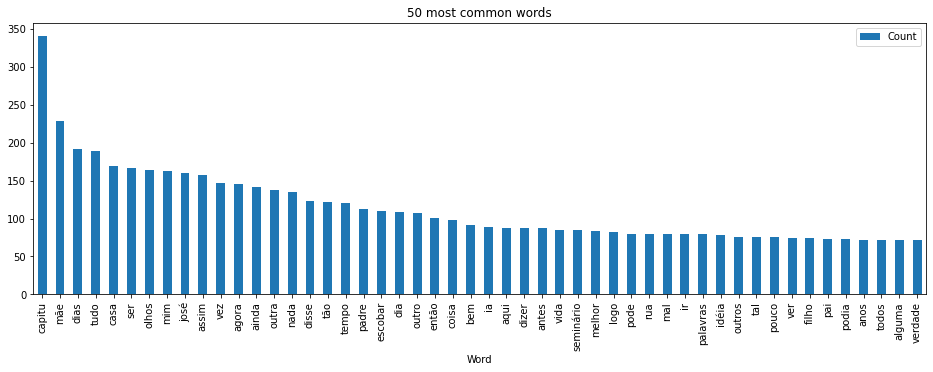

In [13]:
df.set_index('Word').plot(kind='bar', figsize=(16,5), title='50 most common words')

### Histograma de Prefixos

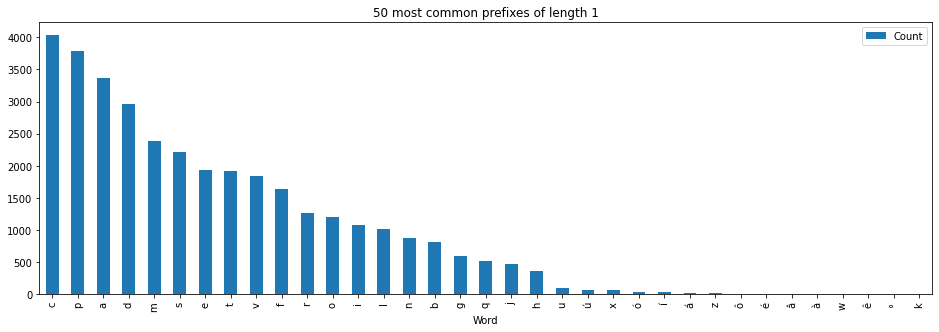

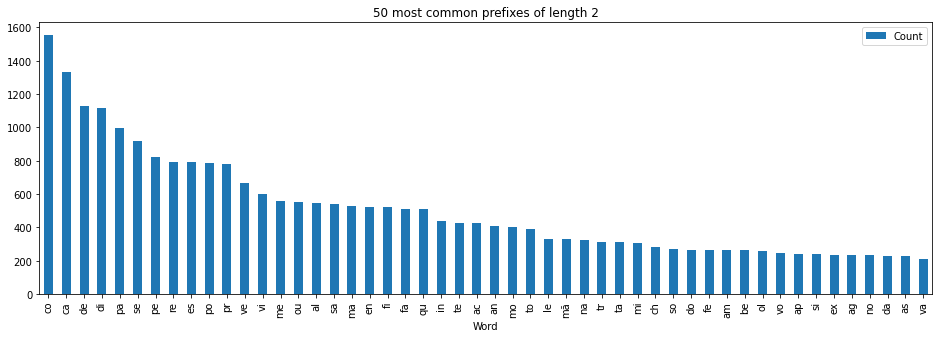

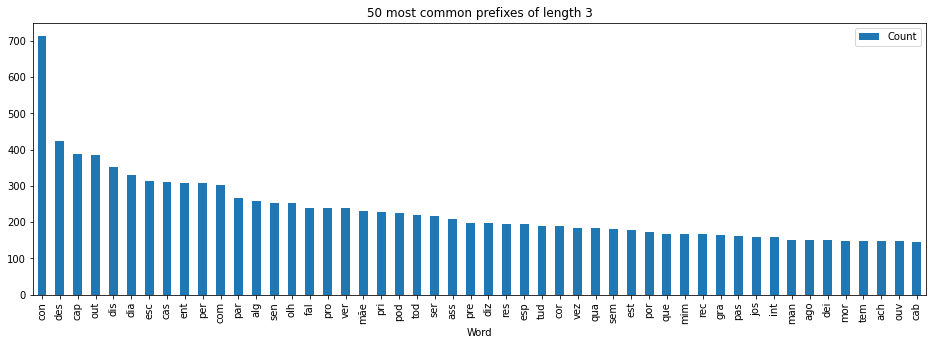

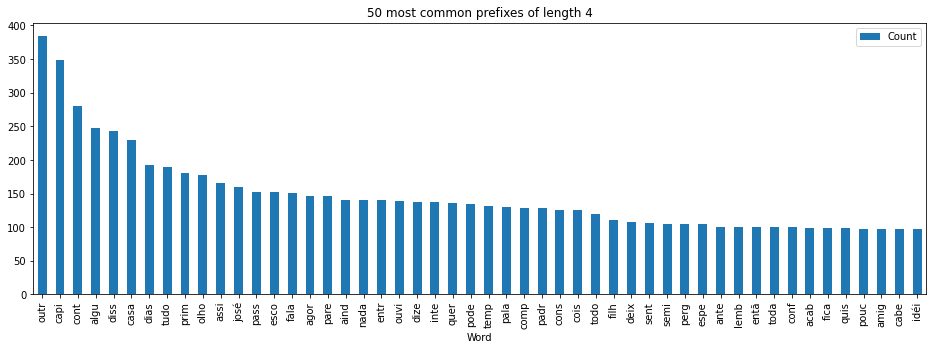

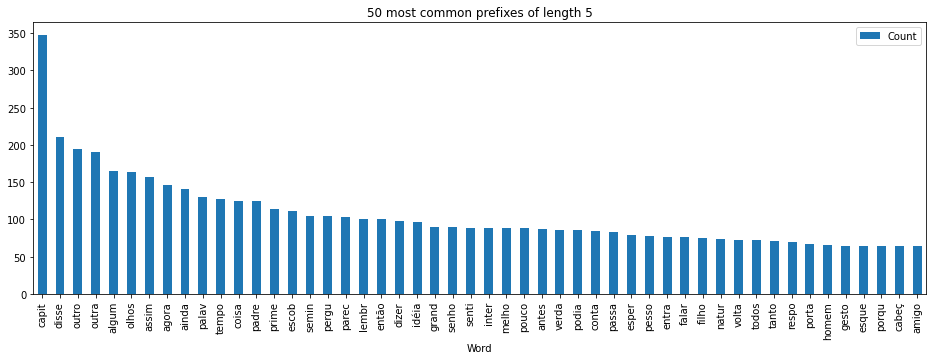

In [14]:
for length in range(1,6):
    prefixes_counter = Counter([token[0:length] for token in processed_tokens if len(token[0:length]) == length])
    data_frame = pandas.DataFrame(prefixes_counter.most_common(50), columns=['Word', 'Count'])
    data_frame.set_index('Word').plot(kind='bar', figsize=(16,5), title=f'50 most common prefixes of length {length}')

### Histograma de sufixos

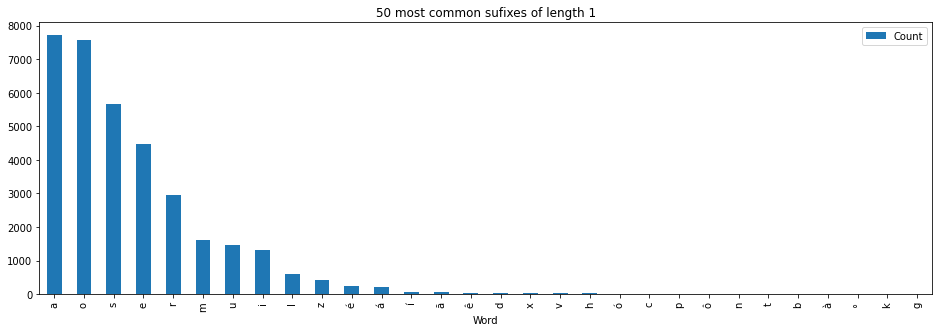

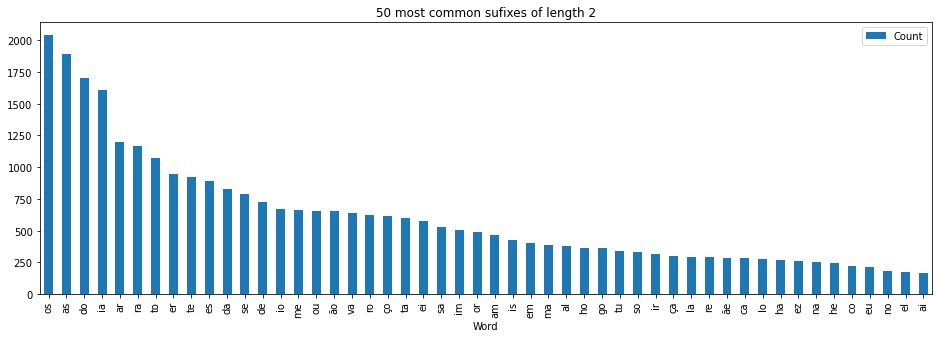

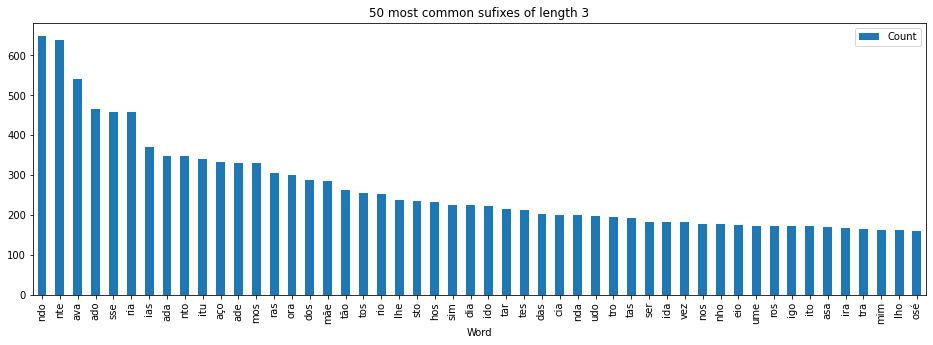

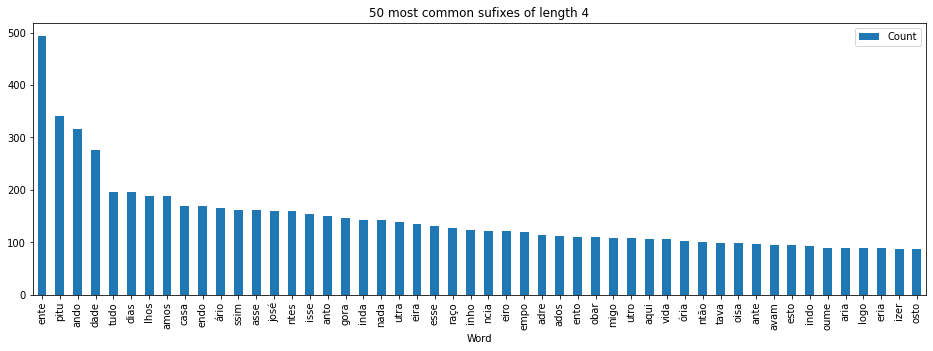

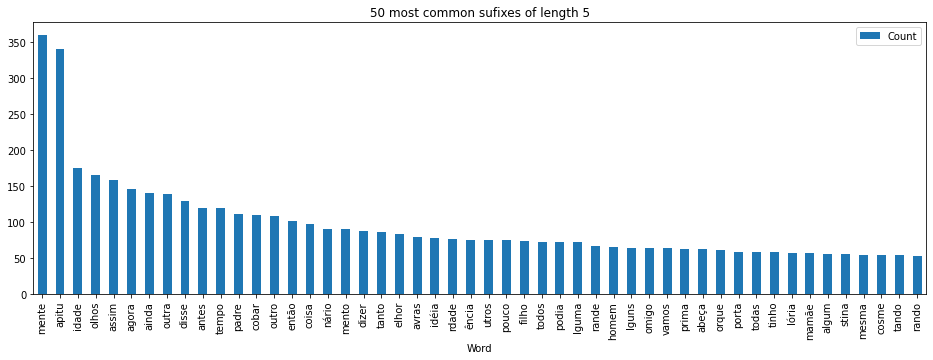

In [15]:
for length in range(1,6):
    sufixes_counter = Counter([token[-length:] for token in processed_tokens if len(token[-length:]) == length])
    data_frame = pandas.DataFrame(sufixes_counter.most_common(50), columns=['Word', 'Count'])
    data_frame.set_index('Word').plot(kind='bar', figsize=(16,5), title=f'50 most common sufixes of length {length}')